**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Gustavo Aispuro Farias
*   MATRÍCULA: A01740067

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [5]:
df = pd.read_csv('responses.csv')
df.info()
num_summary = df.describe()
ob_summary = df.describe(include = 'object')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


<function matplotlib.pyplot.show(close=None, block=None)>

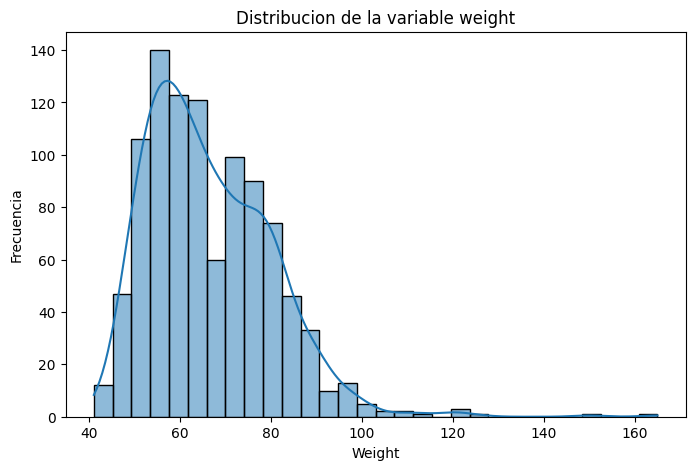

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Weight'], bins = 30, kde = True)
plt.title('Distribucion de la variable weight')
plt.xlabel('Weight')
plt.ylabel('Frecuencia')
plt.show
#Elegimos un histograma debido a que es una variable numerica que puede tomar cualquier valor dentro de un rango, por lo que un histograma es mas adecuado porque nos muestra la distribucion de los valores de manera continua.

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [20]:
weight_skew = df['Weight'].skew()
print(f"Asimetria de la variable Weight: {weight_skew}")
if weight_skew > 0:
    print("La distribucion de Weight tiene cola a la derecha")
elif weight_skew < 0:
    print("La distribucion de Weight tiene cola a la izquierda")
else:
    print("La distribucion de Weight es simetrica")


Asimetria de la variable Weight: 1.2237251927527477
La distribucion de Weight tiene cola a la derecha


4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [9]:
missing_weight = df['Weight'].isnull().sum()
missing_percentage = (missing_weight / len(df)) * 100
print(f"Valores faltantes en Weight: {missing_weight}")
print(f"Porcentaje de valores faltantes: {missing_percentage:.2f}%")

Valores faltantes en Weight: 20
Porcentaje de valores faltantes: 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [12]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [14]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [19]:
median_weight = df['Weight'].median()
df['Weight'].fillna(median_weight, inplace = True)
print(f"Mediana: {median_weight}")
#La mediana es una buena opcion debido a que es menos sensible a los valores atipicos que tomaria en cuenta la media.

Mediana: 64.0


C:\Users\gusai\AppData\Local\Temp\ipykernel_3876\3706548049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(median_weight, inplace = True)


7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

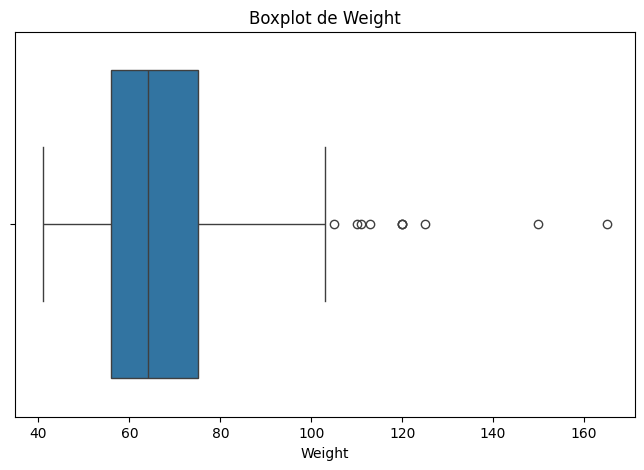

Cantidad de valores atípicos en Weight: 10


In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weight'])
plt.title('Boxplot de Weight')
plt.show()

Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_weight = df[(df['Weight'] < lower_bound) | (df['Weight'] > upper_bound)]
print(f"Cantidad de valores atípicos en Weight: {len(outliers_weight)}")

df_clean = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

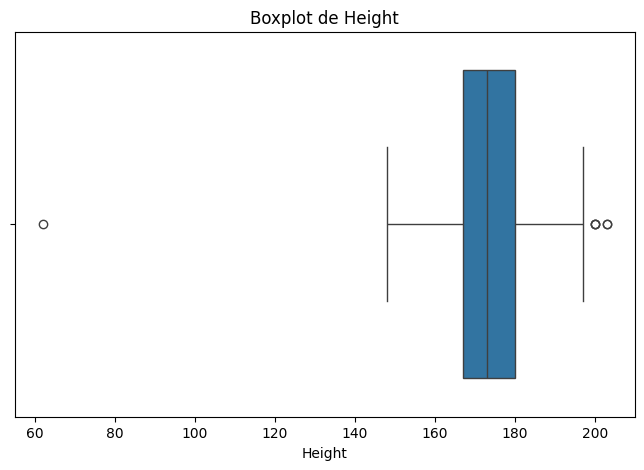

Cantidad de valores atípicos en Height: 6


In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Height'])
plt.title('Boxplot de Height')
plt.show()

Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_height = df[(df['Height'] < lower_bound) | (df['Height'] > upper_bound)]
print(f"Cantidad de valores atípicos en Height: {len(outliers_height)}")

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

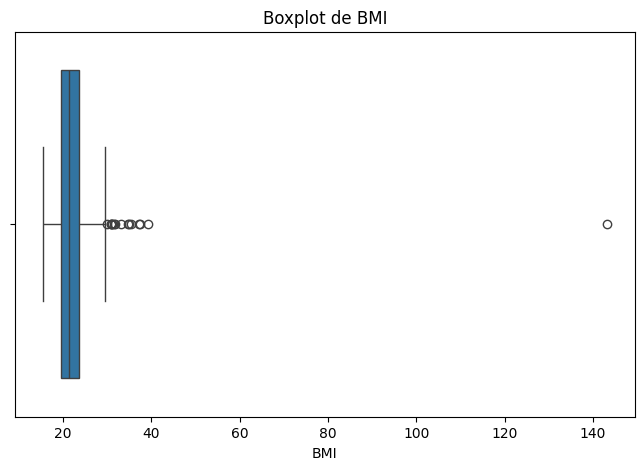

Cantidad de valores atípicos en BMI: 15


In [24]:
df['Height_m'] = df['Height'] / 100

df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['BMI'])
plt.title('Boxplot de BMI')
plt.show()

Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_bmi = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print(f"Cantidad de valores atípicos en BMI: {len(outliers_bmi)}")

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

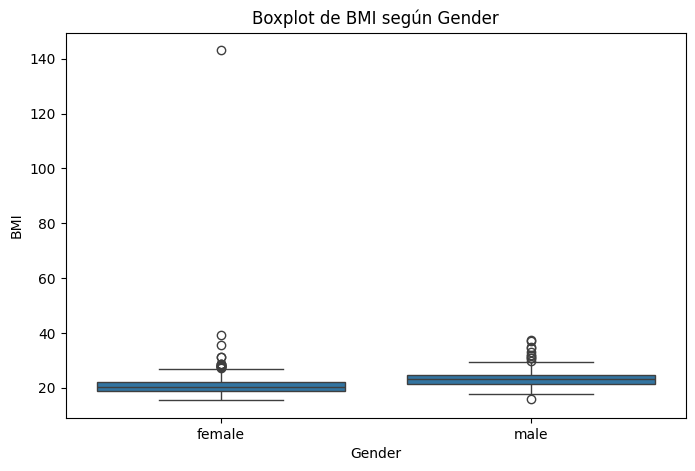

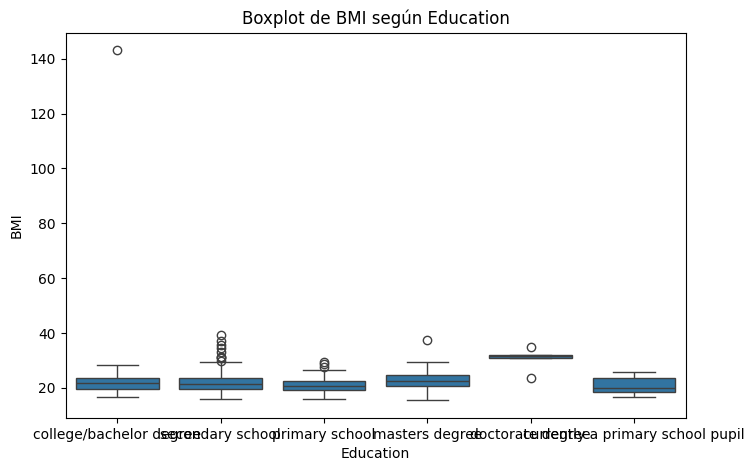

In [ ]:
for col in ['Gender', 'Education']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='BMI', data=df)
    plt.title(f'Boxplot de BMI según {col}')
    plt.show()
    #Me llama la atencion de como el dato atipico de mas de 140 de BMI sale a relucir en ambos boxplots, por lo que sabemos que es una mujer en la universidad con este BMI tan alto.